In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
### Define the following binomial discrete random variables
B1=stats.binom(1,1/100)
B2=stats.binom(1,1/1000)
B3=stats.binom(1,1/2)

In [9]:
def sample(N,forcep=None):
    Np=B1.rvs(N)
    Ns=B2.rvs(N)
    Nc=B3.rvs(N)
    P=1
    S=1
    V=(Np*P+Ns*S)
    C=((V>0)-Nc)>0
    out=np.array((V,C))
    if not forcep is None:
        P2=np.ones(N)*forcep
        V2=(Np*P2+Ns*S)
        C2=((V2>0)-Nc)>0
        out=np.concatenate((out[None],np.array((V2,C2))[None]),axis=0)
    return out

[0.90992012 0.09007988]


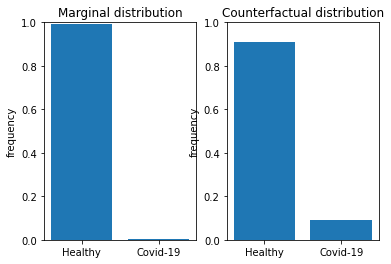

In [3]:
x=sample(int(1e7),forcep=0)
freqc=np.array([(x[0][-1]==i).sum() for i in np.unique(x[0][-1])])/len(x[0][-1])

cdot=x[1][-1][(x[0][-1]==1)]
freqcdot=np.array([(cdot==i).sum() for i in np.unique(cdot)])/len(cdot)
fig=plt.figure()

plt.subplot(1,2,1)
ax=plt.gca()
plt.bar((0,1),freqc)
#ax.set_xlabel('Covid-19')
ax.set_title('Marginal distribution')
ax.set_ylabel('frequency')
ax.set_xticks((0,1))
ax.set_xticklabels(('Healthy','Covid-19'))
plt.ylim(0,1)

plt.subplot(1,2,2)
ax=plt.gca()
plt.bar((0,1),freqcdot)
#ax.set_xlabel('Covid-19')
ax.set_title('Counterfactual distribution')
ax.set_ylabel('frequency')
ax.set_xticks((0,1))
ax.set_xticklabels(('Healthy','Covid-19'));  
plt.ylim(0,1)
print(freqcdot)